In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取Excel文件
excel_file = 'trainset.xlsx'

# 读取三个表格
df1 = pd.read_excel(excel_file, sheet_name='材料1')
df2 = pd.read_excel(excel_file, sheet_name='材料2')
df3 = pd.read_excel(excel_file, sheet_name='材料3')
df4 = pd.read_excel(excel_file, sheet_name='材料4')

# 合并表格
df = pd.concat([df1, df2, df3, df4])

In [6]:
df.head()

,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,25,50030,1997.955250,正弦波,0.000213,0.000389,0.000566,0.000743,0.000919,0.001096,...,-0.001551,-0.001374,-0.001198,-0.001022,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036
1,25,50020,2427.749830,正弦波,-0.000551,-0.000358,-0.000165,0.000028,0.000221,0.000413,...,-0.002476,-0.002284,-0.002091,-0.001899,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744
2,25,50020,3332.725760,正弦波,-0.003780,-0.003564,-0.003349,-0.003134,-0.002919,-0.002704,...,-0.005927,-0.005713,-0.005499,-0.005285,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995
3,25,50020,4502.908007,正弦波,-0.000511,-0.000267,-0.000023,0.000222,0.000466,0.000711,...,-0.002950,-0.002707,-0.002463,-0.002220,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756
4,25,50030,6063.023248,正弦波,0.000458,0.000732,0.001007,0.001281,0.001555,0.001830,...,-0.002290,-0.002016,-0.001741,-0.001466,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183


In [2]:
# 样本拆分
df1_sin = df1[df1['励磁波形'] == '正弦波']
df2_sin = df2[df2['励磁波形'] == '正弦波']
df3_sin = df3[df3['励磁波形'] == '正弦波']
df4_sin = df4[df4['励磁波形'] == '正弦波']

P1 = df1_sin['磁芯损耗，w/m3']
P2 = df2_sin['磁芯损耗，w/m3']
P3 = df3_sin['磁芯损耗，w/m3']
P4 = df4_sin['磁芯损耗，w/m3']

f1 = df1_sin['频率，Hz']
f2 = df2_sin['频率，Hz']
f3 = df3_sin['频率，Hz']
f4 = df4_sin['频率，Hz']

B1_m = df1_sin.iloc[:,-1024:]
B1_m = B1_m.max(axis=1)
B2_m = df2_sin.iloc[:,-1024:]
B2_m = B2_m.max(axis=1)
B3_m = df3_sin.iloc[:,-1024:]
B3_m = B3_m.max(axis=1)
B4_m = df4_sin.iloc[:,-1024:]
B4_m = B4_m.max(axis=1)

# 对数据取log
logP1 = P1.apply(np.log)
logP2 = P2.apply(np.log)
logP3 = P3.apply(np.log)
logP4 = P4.apply(np.log)

logf1 = f1.apply(np.log)
logf2 = f2.apply(np.log)
logf3 = f3.apply(np.log)
logf4 = f4.apply(np.log)

logB1_m = B1_m.apply(np.log)
logB2_m = B2_m.apply(np.log)
logB3_m = B3_m.apply(np.log)
logB4_m = B4_m.apply(np.log)

In [51]:
# from sklearn.linear_model import LinearRegression
# from scipy.stats import ttest_ind  # t统计检验
# # 材料1线性回归模型
# X1 = np.array(pd.DataFrame([logf1,logB1_m])).T  # shape (n_samples, 1)
# y1 = logP1  # shape (n_samples,)

# # create a linear regression model
# model1 = LinearRegression()

# # fit the model to the data
# model1.fit(X1, y1)

# # get the coefficients
# beta0 = model1.intercept_
# beta1 = model1.coef_

# k1_1 = np.exp(beta0)
# alpha1_1 = beta1[0]
# beta1_1 = beta1[1]

# print(k1_1)
# print(alpha1_1)
# print(beta1_1)

0.19188767398177675
1.6059339420803116
2.5066089643710607


In [27]:
import statsmodels.api as sm
X1 = np.array(pd.DataFrame([logf1,logB1_m])).T  # shape (n_samples, 1)
y1 = logP1  # shape (n_samples,)
y1 = np.array(y1)
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1,X1).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                  周一, 23 9月 2024   Prob (F-statistic):               0.00
Time:                        11:13:17   Log-Likelihood:                -409.66
No. Observations:                1067   AIC:                             825.3
Df Residuals:                    1064   BIC:                             840.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6508      0.248     -6.666      0.000      -2.137      -1.165
x1             1.6059      0.022     72.352      0.000       1.562       1.649
x2             2.5066      0.014    177.105      0.000       2.479       2.534
==============================================================================
Omnibus:                       28.980   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.840
Skew:                           0.139   Prob(JB):                     0.000220
Kurtosis:                       2.450   Cond. No.                         276.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# 材料2线性回归模型
X2 = np.array(pd.DataFrame([logf2,logB2_m])).T  # shape (n_samples, 1)
y2 = logP2  # shape (n_samples,)

X2 = sm.add_constant(X2)
# create a linear regression model
model2 = sm.OLS(y2,X2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              磁芯损耗，w/m3   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 1.208e+04
Date:                  周一, 23 9月 2024   Prob (F-statistic):               0.00
Time:                        10:59:57   Log-Likelihood:                -528.41
No. Observations:                1097   AIC:                             1063.
Df Residuals:                    1094   BIC:                             1078.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6059      0.216    -12.056      0.0

In [23]:
# 材料3线性回归模型
X3 = np.array(pd.DataFrame([logf3,logB3_m])).T  # shape (n_samples, 1)
y3 = logP3  # shape (n_samples,)

X3 = sm.add_constant(X3)
# create a linear regression model
model3 = sm.OLS(y3,X3).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              磁芯损耗，w/m3   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.327e+04
Date:                  周一, 23 9月 2024   Prob (F-statistic):               0.00
Time:                        11:00:35   Log-Likelihood:                -397.52
No. Observations:                1010   AIC:                             801.0
Df Residuals:                    1007   BIC:                             815.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2098      0.201     -6.030      0.0

In [24]:
# 材料4线性回归模型
X4 = np.array(pd.DataFrame([logf4,logB4_m])).T  # shape (n_samples, 1)
y4 = logP4  # shape (n_samples,)

X4 = sm.add_constant(X4)
# create a linear regression model
model4 = sm.OLS(y4,X4).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:              磁芯损耗，w/m3   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     9357.
Date:                  周一, 23 9月 2024   Prob (F-statistic):               0.00
Time:                        11:01:44   Log-Likelihood:                -307.08
No. Observations:                 880   AIC:                             620.2
Df Residuals:                     877   BIC:                             634.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8756      0.225     -3.888      0.0

In [28]:
# r2值函数
def r2(y_true,y_pred):
    R2 = 1-np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_pred)) ** 2)
    return R2
    

In [26]:
# 材料1不同温度下模型效果差异
plt.rcParams['font.family'] = ['SimHei']  # Use SimHei font to display Chinese characters
plt.rcParams['font.size'] = 10

X1_tem25 = X1[df1_sin['温度，oC']==25]
X1_tem50 = X1[df1_sin['温度，oC']==50]
X1_tem70 = X1[df1_sin['温度，oC']==70]
X1_tem90 = X1[df1_sin['温度，oC']==90]

y1_tem25 = y1[df1_sin['温度，oC']==25]
y1_tem50 = y1[df1_sin['温度，oC']==50]
y1_tem70 = y1[df1_sin['温度，oC']==70]
y1_tem90 = y1[df1_sin['温度，oC']==90]

plt.plot(y1_tem25,label='真实值')
plt.plot(model1.predict(X1_tem25),label='预测值')
plt.legend()
plt.show()

y1_tem25_pred = model1.predict(X1_tem25)
y1_tem50_pred = model1.predict(X1_tem50)
y1_tem70_pred = model1.predict(X1_tem70)
y1_tem90_pred = model1.predict(X1_tem90)
r2_tem25 = 1-np.sum((y1_tem25 - y1_tem25_pred) ** 2) / np.sum((y1_tem25 - np.mean(y1_tem25_pred)) ** 2)
r2_tem50 = 1-np.sum((y1_tem50 - y1_tem50_pred) ** 2) / np.sum((y1_tem50 - np.mean(y1_tem50_pred)) ** 2)
r2_tem70 = 1-np.sum((y1_tem70 - y1_tem70_pred) ** 2) / np.sum((y1_tem70 - np.mean(y1_tem70_pred)) ** 2)
r2_tem90 = 1-np.sum((y1_tem90 - y1_tem90_pred) ** 2) / np.sum((y1_tem90 - np.mean(y1_tem90_pred)) ** 2)

print("------------R^2---------------")
print(r2(y1_tem25,y1_tem25_pred))
print(r2_tem50)
print(r2_tem70)
print(r2_tem90)

print("------------mse---------------")
print(np.mean((model1.predict(X1_tem25)-y1_tem25) ** 2))
print(np.mean((model1.predict(X1_tem50)-y1_tem50) ** 2))
print(np.mean((model1.predict(X1_tem70)-y1_tem70) ** 2))
print(np.mean((model1.predict(X1_tem90)-y1_tem90) ** 2))

IndexError: boolean index did not match indexed array along axis 0; size of axis is 1097 but size of corresponding boolean axis is 1067

In [38]:
# 材料2不同温度下模型效果差异
X2_tem25 = X2[df2_sin['温度，oC']==25]
X2_tem50 = X2[df2_sin['温度，oC']==50]
X2_tem70 = X2[df2_sin['温度，oC']==70]
X2_tem90 = X2[df2_sin['温度，oC']==90]

y2_tem25 = y2[df2_sin['温度，oC']==25]
y2_tem50 = y2[df2_sin['温度，oC']==50]
y2_tem70 = y2[df2_sin['温度，oC']==70]
y2_tem90 = y2[df2_sin['温度，oC']==90]




print("------------R^2---------------")
print(model2.score(X2_tem25, y2_tem25))
print(model2.score(X2_tem50, y2_tem50))
print(model2.score(X2_tem70, y2_tem70))
print(model2.score(X2_tem90, y2_tem90))
print("------------mse---------------")
print(np.mean((model2.predict(X2_tem25)-y2_tem25) ** 2))
print(np.mean((model2.predict(X2_tem50)-y2_tem50) ** 2))
print(np.mean((model2.predict(X2_tem70)-y2_tem70) ** 2))
print(np.mean((model2.predict(X2_tem90)-y2_tem90) ** 2))

0.935725469379032
0.9906826875439834
0.9654781584652985
0.9371723923517873


In [47]:
# 材料3不同温度下模型效果差异
X3_tem25 = X3[df3_sin['温度，oC']==25]
X3_tem50 = X3[df3_sin['温度，oC']==50]
X3_tem70 = X3[df3_sin['温度，oC']==70]
X3_tem90 = X3[df3_sin['温度，oC']==90]

y3_tem25 = y3[df3_sin['温度，oC']==25]
y3_tem50 = y3[df3_sin['温度，oC']==50]
y3_tem70 = y3[df3_sin['温度，oC']==70]
y3_tem90 = y3[df3_sin['温度，oC']==90]
print("------------R^2---------------")
print(model3.score(X3_tem25, y3_tem25))
print(model3.score(X3_tem50, y3_tem50))
print(model3.score(X3_tem70, y3_tem70))
print(model3.score(X3_tem90, y3_tem90))
print("------------mse---------------")
print(np.mean((model3.predict(X3_tem25)-y3_tem25) ** 2))
print(np.mean((model3.predict(X3_tem50)-y3_tem50) ** 2))
print(np.mean((model3.predict(X3_tem70)-y3_tem70) ** 2))
print(np.mean((model3.predict(X3_tem90)-y3_tem90) ** 2))

------------R^2---------------
0.9437820449729272
0.9928479495430281
0.9636396153544295
0.951123314444607
------------mse---------------
0.19406960333853496
0.025566693114476055
0.12222621491805558
0.16851301341561498


In [48]:
# 材料4不同温度下模型效果差异
X4_tem25 = X4[df4_sin['温度，oC']==25]
X4_tem50 = X4[df4_sin['温度，oC']==50]
X4_tem70 = X4[df4_sin['温度，oC']==70]
X4_tem90 = X4[df4_sin['温度，oC']==90]

y4_tem25 = y4[df4_sin['温度，oC']==25]
y4_tem50 = y4[df4_sin['温度，oC']==50]
y4_tem70 = y4[df4_sin['温度，oC']==70]
y4_tem90 = y4[df4_sin['温度，oC']==90]
print("------------R^2---------------")
print(model4.score(X4_tem25, y4_tem25))
print(model4.score(X4_tem50, y4_tem50))
print(model4.score(X4_tem70, y4_tem70))
print(model4.score(X4_tem90, y4_tem90))
print("------------mse---------------")
print(np.mean((model4.predict(X4_tem25)-y4_tem25) ** 2))
print(np.mean((model4.predict(X4_tem50)-y4_tem50) ** 2))
print(np.mean((model4.predict(X4_tem70)-y4_tem70) ** 2))
print(np.mean((model4.predict(X4_tem90)-y4_tem90) ** 2))

------------R^2---------------
0.9056849502294634
0.989999838055112
0.9745151705803343
0.9364311695074905
------------mse---------------
0.20635396432990127
0.02708682945568709
0.06930170563890642
0.17694817095525064


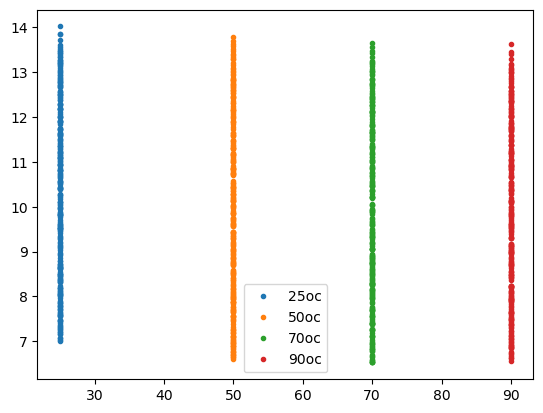

In [67]:
n = len(y1_tem25)
x = [25 for xx in range(n)]
plt.plot(x, y1_tem25, '.', label='25oc')

n = len(y1_tem50)
x = [50 for xx in range(n)]
plt.plot(x, y1_tem50, '.', label='50oc')

n = len(y1_tem70)
x = [70 for xx in range(n)]
plt.plot(x, y1_tem70, '.', label='70oc')

n = len(y1_tem90)
x = [90 for xx in range(n)]
plt.plot(x, y1_tem90, '.', label='90oc')
plt.legend()
plt.show()

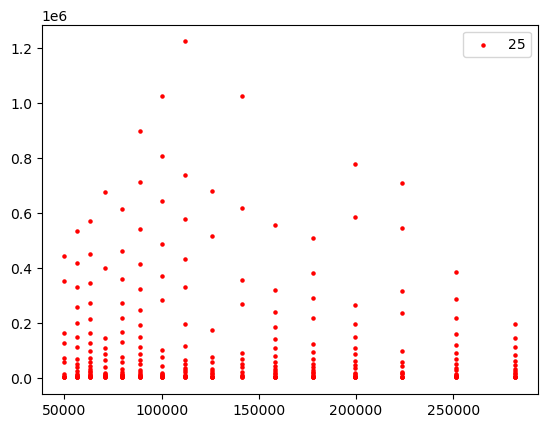

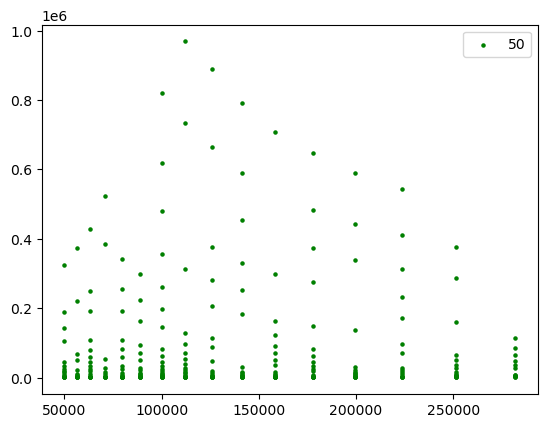

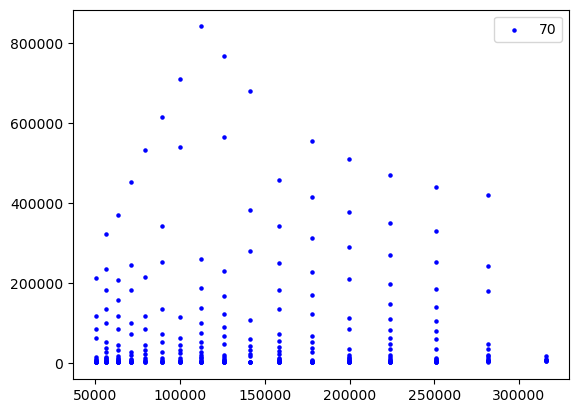

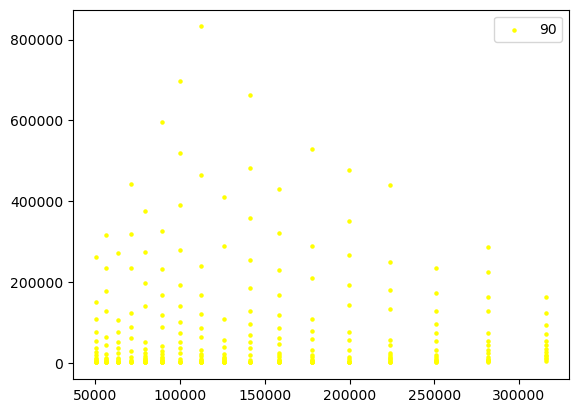

In [87]:
# 定义颜色列表
colors = ['red', 'green', 'blue', 'yellow']
temp = [25, 50, 70, 90]
# 使用 plt.scatter 函数来绘制hz散点图
for i in range(4):
    label_mask = df1_sin['温度，oC'] == temp[i]
    plt.scatter(np.exp(X1[label_mask, 0]), np.exp(y1[label_mask]), s=5,label=temp[i], c=colors[i % len(colors)])

    # 添加图例
    plt.legend()

    # 显示图形
    plt.show()

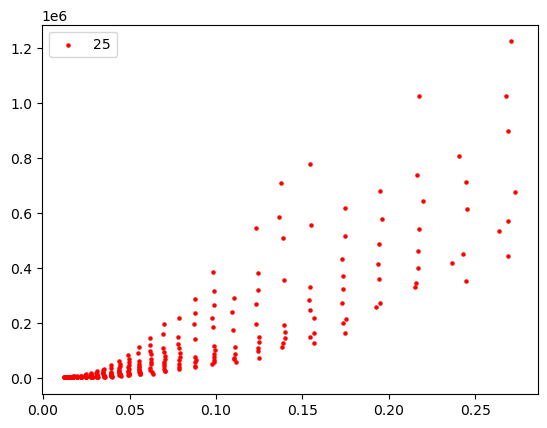

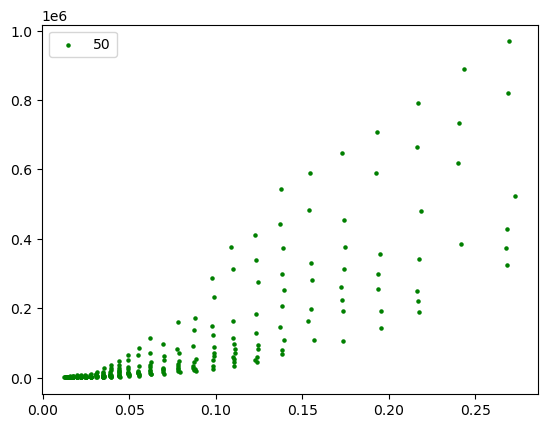

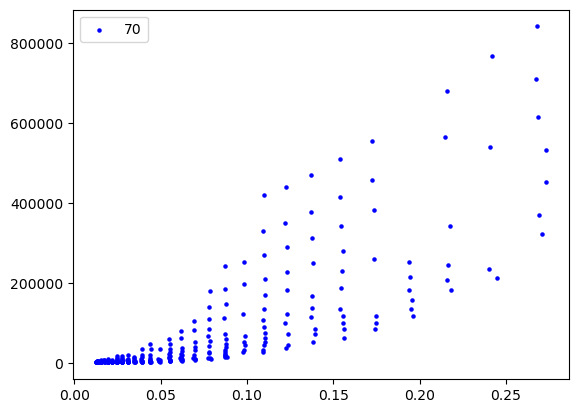

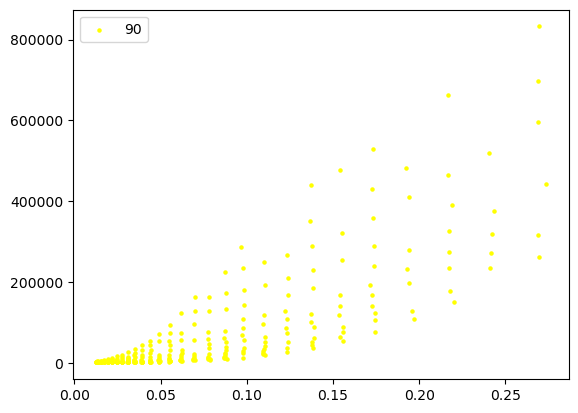

In [88]:
# 定义颜色列表
colors = ['red', 'green', 'blue', 'yellow']
temp = [25, 50, 70, 90]
# 使用 plt.scatter 函数来绘制hz散点图
for i in range(4):
    label_mask = df1_sin['温度，oC'] == temp[i]
    plt.scatter(np.exp(X1[label_mask, 1]), np.exp(y1[label_mask]), s=5,label=temp[i], c=colors[i % len(colors)])

    # 添加图例
    plt.legend()

    # 显示图形
    plt.show()

In [116]:
# 假设k_1=kt
logT = np.array(df1_sin['温度，oC'].apply(np.log))
X = np.column_stack((X1, logT))
y = y1
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())
X_tem25 = X[df1_sin['温度，oC']==25]
X_tem50 = X[df1_sin['温度，oC']==50]
X_tem70 = X[df1_sin['温度，oC']==70]
X_tem90 = X[df1_sin['温度，oC']==90]
y1_tem25_pred = model.predict(X_tem25)
y1_tem50_pred = model.predict(X_tem50)
y1_tem70_pred = model.predict(X_tem70)
y1_tem90_pred = model.predict(X_tem90)
r2_tem25 = 1-np.sum((y1_tem25 - y1_tem25_pred) ** 2) / np.sum((y1_tem25 - np.mean(y1_tem25_pred)) ** 2)
r2_tem50 = 1-np.sum((y1_tem50 - y1_tem50_pred) ** 2) / np.sum((y1_tem50 - np.mean(y1_tem50_pred)) ** 2)
r2_tem70 = 1-np.sum((y1_tem70 - y1_tem70_pred) ** 2) / np.sum((y1_tem70 - np.mean(y1_tem70_pred)) ** 2)
r2_tem90 = 1-np.sum((y1_tem90 - y1_tem90_pred) ** 2) / np.sum((y1_tem90 - np.mean(y1_tem90_pred)) ** 2)
# 材料1不同温度下模型效果差异
print("------------R^2---------------")
print(r2_tem25)
print(r2_tem50)
print(r2_tem70)
print(r2_tem90)

# print("------------mse---------------")
print(np.mean((y1_tem25_pred-y1_tem25) ** 2))
print(np.mean((y1_tem50_pred-y1_tem50) ** 2))
print(np.mean((y1_tem70_pred-y1_tem70) ** 2))
print(np.mean((y1_tem90_pred-y1_tem90) ** 2))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.379e+04
Date:                  周日, 22 9月 2024   Prob (F-statistic):               0.00
Time:                        17:09:32   Log-Likelihood:                 203.83
No. Observations:                1067   AIC:                            -399.7
Df Residuals:                    1063   BIC:                            -379.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3804      0.146      2.610      0.0